In [1]:
import pandas as pd

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CSCO    251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


<Axes: xlabel='Date'>

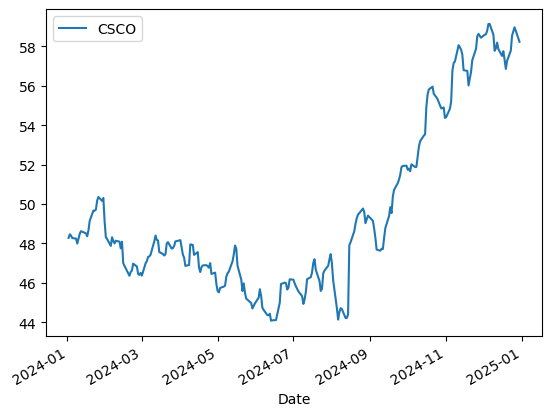

In [2]:
df = pd.read_csv ('CSCO.csv', parse_dates = ['Date'] , index_col = 'Date')
df.info()
df.plot()

In [3]:
df_train = df.iloc[:-30].copy()  # All rows except last 30
df_test = df.iloc[-30:].copy()

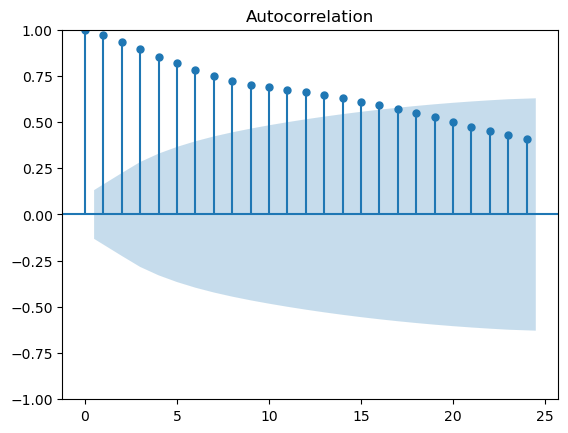

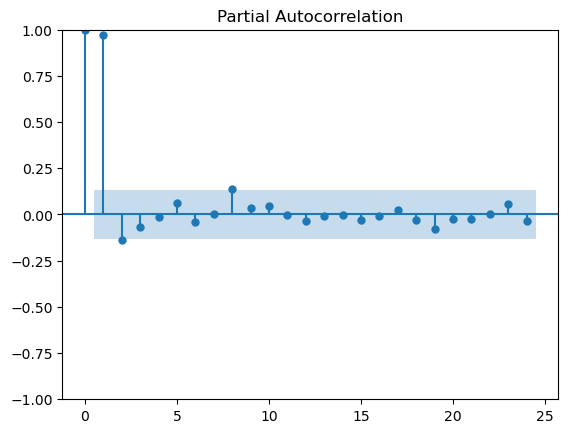

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf (df_train)
pacf_original = plot_pacf (df_train)

In [5]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller (df_train)
print (f'p-value: {adf_test[1]}')

p-value: 0.9550454555709469


<Axes: xlabel='Date'>

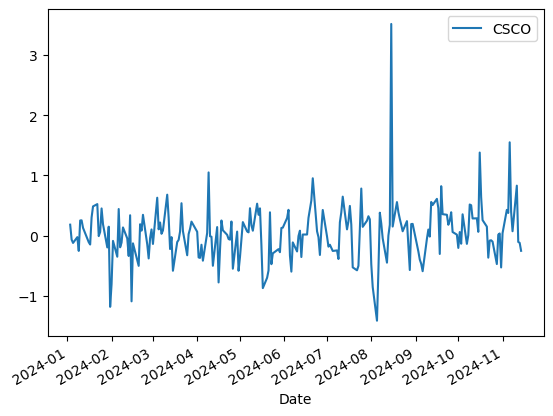

In [6]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

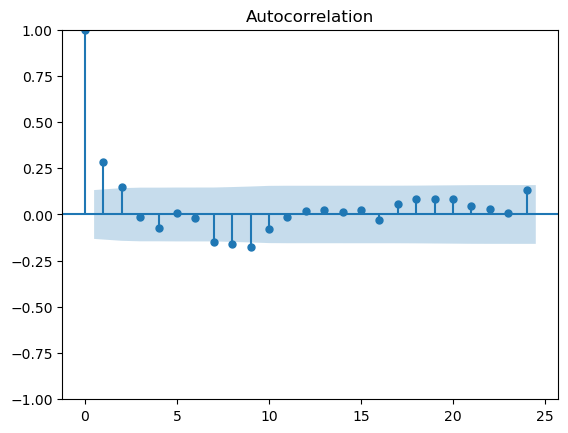

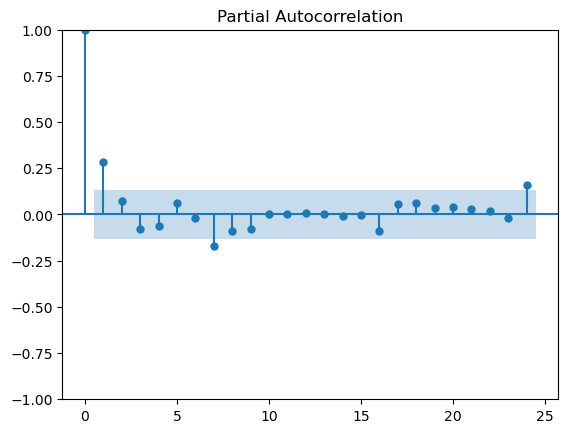

In [7]:
acf_diff = plot_acf (df_train_diff)
pacf_diff = plot_pacf (df_train_diff)

In [8]:
adf_test = adfuller(df_train_diff)
print (f'p-value: {adf_test[2]}')

p-value: 0


In [9]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA (df_train, order = (1,1,0))
model_fit = model.fit()
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   CSCO   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -134.397
Date:                Mon, 14 Jul 2025   AIC                            272.794
Time:                        21:21:11   BIC                            279.582
Sample:                             0   HQIC                           275.535
                                - 221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2911      0.053      5.449      0.000       0.186       0.396
sigma2         0.1986      0.006     31.189      0.000       0.186       0.211
Ljung-Box (L1) (Q):                   0.15   Jarque-

C:\Users\nidhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nidhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nidhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


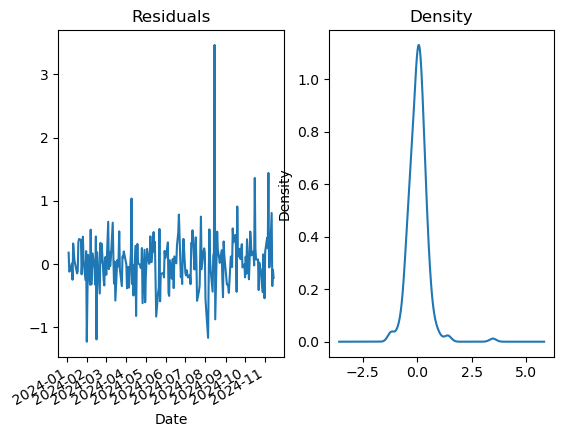

In [17]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot (title = 'Residuals' , ax = ax[0])
residuals.plot (title = 'Density' , kind = 'kde' , ax = ax [1])
plt.show()

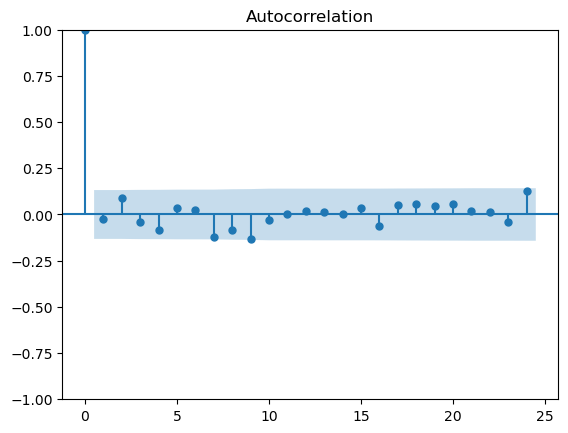

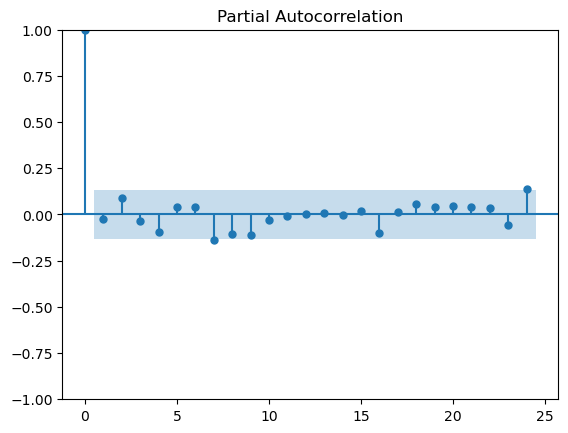

In [18]:
acf_res = plot_acf (residuals)
pacf_res = plot_pacf (residuals)

C:\Users\nidhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nidhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

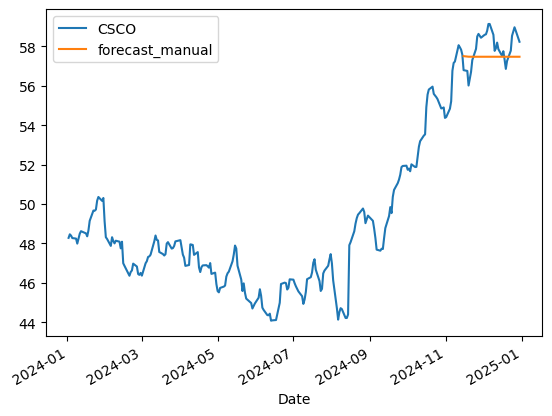

In [19]:
forecast_test= model_fit.forecast (len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list (forecast_test)
df.plot()

In [24]:
import pmdarima as pm
auto_arima = pm.auto_arima (df_train, stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True)

In [25]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  221
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -132.502
Date:                Mon, 14 Jul 2025   AIC                            273.004
Time:                        21:30:30   BIC                            286.579
Sample:                             0   HQIC                           278.486
                                - 221                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0420      0.051      0.821      0.412      -0.058       0.142
ma.L1          0.2603      0.057      4.562      0.000       0.148       0.372
ma.L2          0.1906      0.090      2.113      0.035       0.014       0.368
sigma2         0.1952      0.008     23.696      0.000       0.179       0.211
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2337.27
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.40   Skew:                             2.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\nidhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nidhi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

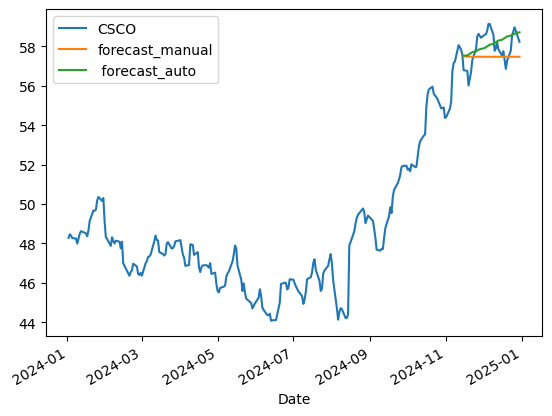

In [26]:
forecast_test_auto = auto_arima.predict(n_periods = len (df_test))
df[' forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

In [28]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test  ))

print(f'mae - manual:{mae}')
print(f'mape - manual:{mape}')
print(f'rmse - manual:{rmse}')

mae - manual:0.8201319091522038
mape - manual:0.014115587603134971
rmse - manual:0.9461974656707639


In [29]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - manual:{mae}')
print(f'mape - manual:{mape}')
print(f'rmse - manual:{rmse}')

mae - manual:0.6996478671393327
mape - manual:0.01213812474097576
rmse - manual:0.8079519651600009
